# American Time Use Survey analysis

The American Time Use Survey (ATUS) is the first federally administered continuous survey on time use in the US. The goal of the survey is to measure how people divide their time along life's activities. The main purpose of ATUS is to develop nationally representative estimates of how people spend their time. 

Please use the two links to directly download the data files needed for this notebook:
- https://www.bls.gov/tus/special.requests/atussum-2019.zip
- https://www.bls.gov/tus/special.requests/atussum-2019.zip

Inidividuals are randomly selected from a subset of households that have completed their eighth month of interviews for the Current Population Survey (CPS). ATUS respondents are interviewed only one time about how they spent their time on the previous day, where they were, and whom they were with. The survey is sponsored by the Bureau of Labor Statistics and is conducted by the US Census Bureau. 

Because ATUS data are collected on an ongoing, monthly basis, time-series data can be analyzed to identify any changes in how people spend their time. 

More information: https://www.bls.gov/tus/atususersguide.pdf

COVID NOTE: Data collection was suspended in 2020 from mid-March to mid-May. ATUS data files for 2020 contain all ATUS data collected in 2020—both before and after data collection was suspended.

#### Sample Allocation
The monthly sample is divided into four randomly selected panels, one for each week
of the month. To ensure good measures of time spent on weekdays and weekend days,
the sample also is split evenly between weekdays and weekend days. During the
assignment of sample codes, 10 percent of the sample is allocated to each weekday,
and 25 percent of the sample is allocated to each weekend day. The designated
persons are then randomly assigned a day of the week about which to report and an initial interview week code. 

In [1]:
import numpy as np
import pandas as pd
#import csv
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [6]:
df2020_full = pd.read_csv('atussum-2020/atussum_2020.dat')
df2019_full = pd.read_csv('atussum-2019/atussum_2019.dat')

#### Use this to map activity code to activity:
https://www.bls.gov/tus/lexiconwex2020.pdf

In [7]:
df2020_full

,TUCASEID,TU20FWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010499,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020299,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020899,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030204,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040202,t040203,t040301,t040399,t040401,t040402,t040403,t040404,t040405,t040499,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050203,t050299,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t060101,t060102,t060103,t060199,t060201,t060202,t060203,t060299,t060301,t060302,t060303,t060399,t060401,t060402,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070201,t080101,t080201,t080202,t080203,t080299,t080301,t080401,t080402,t080403,t080499,t080501,t080502,t080599,t080601,t080602,t080701,t080702,t080801,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090402,t090501,t090502,t090599,t099999,t100102,t100103,t100199,t100201,t100299,t100304,t100305,t110101,t110201,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130210,t130211,t130212,t130213,t130216,t130220,t130224,t130227,t130229,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150302,t150399,t150401,t150402,t150499,t150501,t150599,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t160201,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180301,t180302,t180303,t180304,t180305,t180399,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t181001,t181002,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181499,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20200101200103,5.541150e+06,-1,85,1,44,2,2,1,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,1,0,-1,0,165,665,20,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,0,0,0,0,0,0,0,0,270,0,0,0,0,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
print(df2020_full.shape)

(8782, 399)


In [11]:
#separate the columns into activity columns and respondent meta-data
activityCols_2020 = [col for col in df2020_full if col.startswith('t')]
metadataCols_2020 = list(set(df2020_full.columns) - set(activityCols_2020))

In [12]:
activityCols_2019 = [col for col in df2019_full if col.startswith('t')]
metadataCols_2019 = list(set(df2019_full.columns) - set(activityCols_2019))

In [13]:
df2020 = df2020_full[metadataCols_2020].copy()
df2019 = df2019_full[metadataCols_2019].copy()

In [16]:
df2020 = df2020.rename(columns={'PEHSPNON': 'HispanicBool', 'TUCASEID': 'CaseID','TESCHENR': 'Enrolled_HSCollUni', 'TRCHILDNUM':'NumChildUnder18', 'TEMJOT':'MoreThan1JobBool',
                                'TESPEMPNOT':'PartnerEmployedStatus','TU20FWGT':'WEIGHT2020','TESEX':'Gender','TESCHLVL':'CurrEduEnrollType',
                               'TRYHHCHILD':'AgeYoungestChildLessThan18','TEAGE':'Age','TRTHH':'TimeSpent_ChildcareLess13','TUDIARYDAY':'DiaryDayofWeek',
                               'PEEDUCA':'HighestEduComplete','TRTEC':'TimeSpent_Eldercare','TELFS':'LaborForceStatus','TRERNWA':'WeeklyEarnings',
                               'TRSPFTPT':'SpouseEmployStatus','TRHOLIDAY':'DiaryDay_HolidayBool','TEHRUSLT':'HoursWorkedperWeek','GTMETSTA':'MetropolitanStatus',
                               'TRSPPRES':'SpousePresentinHousehold','PTDTRACE':'Race','TRDPFTPT':'EmploymentStatus'})

In [17]:
df2019 = df2019.rename(columns={'PEHSPNON': 'HispanicBool', 'TUCASEID': 'CaseID','TESCHENR': 'Enrolled_HSCollUni', 'TRCHILDNUM':'NumChildUnder18', 'TEMJOT':'MoreThan1JobBool',
                                'TESPEMPNOT':'PartnerEmployedStatus','TUFINLWGT':'WEIGHT2019','TESEX':'Gender','TESCHLVL':'CurrEduEnrollType',
                               'TRYHHCHILD':'AgeYoungestChildLessThan18','TEAGE':'Age','TRTHH':'TimeSpent_ChildcareLess13','TUDIARYDAY':'DiaryDayofWeek',
                               'PEEDUCA':'HighestEduComplete','TRTEC':'TimeSpent_Eldercare','TELFS':'LaborForceStatus','TRERNWA':'WeeklyEarnings',
                               'TRSPFTPT':'SpouseEmployStatus','TRHOLIDAY':'DiaryDay_HolidayBool','TEHRUSLT':'HoursWorkedperWeek','GTMETSTA':'MetropolitanStatus',
                               'TRSPPRES':'SpousePresentinHousehold','PTDTRACE':'Race','TRDPFTPT':'EmploymentStatus'})

In [18]:
df2020.head()

,MetropolitanStatus,LaborForceStatus,Age,SpouseEmployStatus,HighestEduComplete,TimeSpent_ChildcareLess13,Enrolled_HSCollUni,DiaryDay_HolidayBool,CaseID,SpousePresentinHousehold,DiaryDayofWeek,MoreThan1JobBool,EmploymentStatus,NumChildUnder18,WEIGHT2020,WeeklyEarnings,AgeYoungestChildLessThan18,HispanicBool,Race,Gender,CurrEduEnrollType,HoursWorkedperWeek,TimeSpent_Eldercare,PartnerEmployedStatus
0,1,5,85,-1,44,0,-1,0,20200101200103,3,1,-1,-1,0,5.541150e+06,-1,-1,2,2,1,-1,-1,-1,-1
1,1,1,43,-1,43,65,2,0,20200101200158,3,4,2,1,2,2.348042e+07,207692,12,2,1,1,-1,40,-1,-1
2,1,1,23,-1,43,0,1,0,20200101200215,3,1,1,2,0,1.043337e+07,31500,-1,2,1,2,2,30,-1,-1
3,1,5,18,-1,39,0,1,0,20200101200256,3,1,-1,-1,1,8.671349e+06,-1,14,1,1,1,2,-1,-1,-1
4,2,1,20,-1,39,0,1,0,20200101200395,3,2,2,2,2,4.514138e+07,17600,6,1,1,1,2,17,-1,-1


# We care about the following major categories:
- 01 = Personal Care
- 02 = Household Activities (interior cleaning, laundry, food prep, etc.)
- 03 = Caring for and helping household members
- 05 = Work & Work-related activities
- 12 = Socializing, Relaxing, and Leisure

In [33]:
#Group columns by major category
ActivityCols_Sleep_2020 = ['t010101','t010102']
ActivityCols_Sleep_2019 = ['t010101','t010102']
ActivityCols_justsleep_2020 = ['t010101']
ActivityCols_justsleep_2019 = ['t010101']

ActivityCols_PersonalCare_2020 = [col for col in df2020_full if col.startswith('t01')]
ActivityCols_PersonalCare_2020 = ActivityCols_PersonalCare_2020[2:]
ActivityCols_HouseholdActivities_2020 = [col for col in df2020_full if col.startswith('t02')]
ActivityCols_CaringforHousehold_2020 = [col for col in df2020_full if col.startswith('t03')]
ActivityCols_Work_2020 = [col for col in df2020_full if col.startswith('t05')]
ActivityCols_Leisure_2020 = [col for col in df2020_full if col.startswith('t12')]

ActivityCols_PersonalCare_2019 = [col for col in df2019_full if col.startswith('t01')]
ActivityCols_PersonalCare_2019 = ActivityCols_PersonalCare_2019[2:]
ActivityCols_HouseholdActivities_2019 = [col for col in df2019_full if col.startswith('t02')]
ActivityCols_CaringforHousehold_2019 = [col for col in df2019_full if col.startswith('t03')]
ActivityCols_Work_2019 = [col for col in df2019_full if col.startswith('t05')]
ActivityCols_Leisure_2019 = [col for col in df2019_full if col.startswith('t12')]

In [34]:
df2020['PersonalTime'] = df2020_full[ActivityCols_PersonalCare_2020].sum(axis=1)
df2020['SleepTime'] = df2020_full[ActivityCols_Sleep_2020].sum(axis=1)
df2020['HouseholdTime'] = df2020_full[ActivityCols_HouseholdActivities_2020].sum(axis=1)
df2020['CareTime'] = df2020_full[ActivityCols_CaringforHousehold_2020].sum(axis=1)
df2020['WorkTime'] = df2020_full[ActivityCols_Work_2020].sum(axis=1)
df2020['LeisureTime'] = df2020_full[ActivityCols_Leisure_2020].sum(axis=1)
df2020['JustSleepTime'] = df2020_full[ActivityCols_justsleep_2020].sum(axis=1)

df2019['PersonalTime'] = df2019_full[ActivityCols_PersonalCare_2019].sum(axis=1)
df2019['SleepTime'] = df2019_full[ActivityCols_Sleep_2019].sum(axis=1)
df2019['HouseholdTime'] = df2019_full[ActivityCols_HouseholdActivities_2019].sum(axis=1)
df2019['CareTime'] = df2019_full[ActivityCols_CaringforHousehold_2019].sum(axis=1)
df2019['WorkTime'] = df2019_full[ActivityCols_Work_2019].sum(axis=1)
df2019['LeisureTime'] = df2019_full[ActivityCols_Leisure_2019].sum(axis=1)
df2019['JustSleepTime'] = df2019_full[ActivityCols_justsleep_2019].sum(axis=1)

In [35]:
df2020

,MetropolitanStatus,LaborForceStatus,Age,SpouseEmployStatus,HighestEduComplete,TimeSpent_ChildcareLess13,Enrolled_HSCollUni,DiaryDay_HolidayBool,CaseID,SpousePresentinHousehold,DiaryDayofWeek,MoreThan1JobBool,EmploymentStatus,NumChildUnder18,WEIGHT2020,WeeklyEarnings,AgeYoungestChildLessThan18,HispanicBool,Race,Gender,CurrEduEnrollType,HoursWorkedperWeek,TimeSpent_Eldercare,PartnerEmployedStatus,PersonalTime,SleepTime,HouseholdTime,CareTime,WorkTime,LeisureTime,JustSleepTime
0,1,5,85,-1,44,0,-1,0,20200101200103,3,1,-1,-1,0,5.541150e+06,-1,-1,2,2,1,-1,-1,-1,-1,35,830,0,0,0,440,165
1,1,1,43,-1,43,65,2,0,20200101200158,3,4,2,1,2,2.348042e+07,207692,12,2,1,1,-1,40,-1,-1,40,420,110,0,470,196,390
2,1,1,23,-1,43,0,1,0,20200101200215,3,1,1,2,0,1.043337e+07,31500,-1,2,1,2,2,30,-1,-1,70,600,20,0,285,305,600
3,1,5,18,-1,39,0,1,0,20200101200256,3,1,-1,-1,1,8.671349e+06,-1,14,1,1,1,2,-1,-1,-1,20,490,14,0,0,596,490
4,2,1,20,-1,39,0,1,0,20200101200395,3,2,2,2,2,4.514138e+07,17600,6,1,1,1,2,17,-1,-1,0,443,30,0,0,334,443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8777,1,1,35,1,43,870,2,0,20201212202264,1,4,2,1,1,1.051645e+07,-1,2,2,1,1,-1,60,-1,1,0,420,0,0,735,210,420
8778,1,5,26,1,34,765,2,0,20201212202289,1,1,-1,-1,2,8.104561e+06,-1,1,2,1,2,-1,-1,-1,1,15,665,0,0,0,450,545
8779,1,2,37,-1,44,0,2,0,20201212202303,1,1,2,1,0,9.937817e+06,259615,-1,2,1,1,-1,40,-1,2,15,555,42,0,0,390,555
8780,1,2,41,1,43,720,1,0,20201212202312,1,3,2,1,2,9.167486e+06,96153,8,2,1,2,2,60,15,1,60,720,235,0,0,390,720


Text(0.5, 0, 'Minutes (in 1 day) Spent Working')

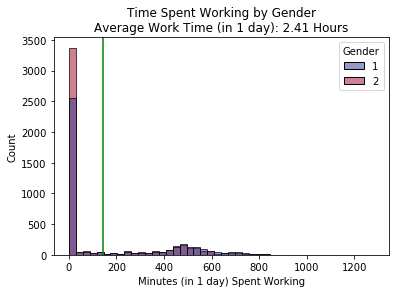

In [23]:
sns.histplot(data=df2020, x="WorkTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
plt.axvline(df2020["WorkTime"].mean(), color='g')
plt.title("Time Spent Working by Gender\nAverage Work Time (in 1 day): {} Hours".format((df2020["WorkTime"].mean()/60).round(2)))
plt.xlabel("Minutes (in 1 day) Spent Working")

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


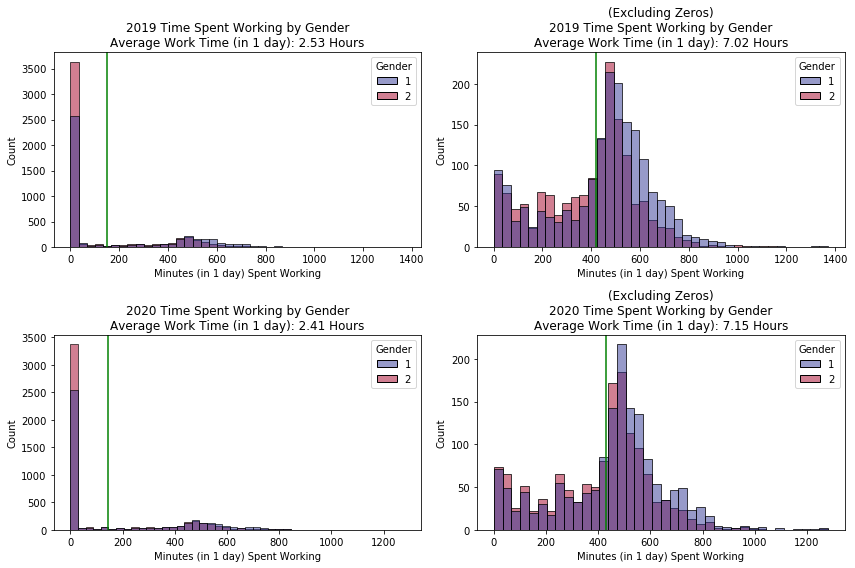

In [24]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

plotWorkdf2019 = df2019[df2019["WorkTime"]>0]
plotWorkdf2020 = df2020[df2020["WorkTime"]>0]

#Plot 2019 Figure with zero on ax1:
sns.histplot(ax=ax1, data=df2019, x="WorkTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax1.axvline(df2019["WorkTime"].mean(), color='g')
ax1.set_title("2019 Time Spent Working by Gender\nAverage Work Time (in 1 day): {} Hours".format((df2019["WorkTime"].mean()/60).round(2)))
ax1.set_xlabel("Minutes (in 1 day) Spent Working")

#Plot 2019 Figure without zeros on ax2:
sns.histplot(ax=ax2, data=plotWorkdf2019, x="WorkTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax2.axvline(plotWorkdf2019["WorkTime"].mean(), color='g')
ax2.set_title("(Excluding Zeros)\n2019 Time Spent Working by Gender\nAverage Work Time (in 1 day): {} Hours".format((plotWorkdf2019["WorkTime"].mean()/60).round(2)))
ax2.set_xlabel("Minutes (in 1 day) Spent Working")

#Plot 2020 Figure with zero on ax3:
sns.histplot(ax=ax3, data=df2020, x="WorkTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax3.axvline(df2020["WorkTime"].mean(), color='g')
ax3.set_title("2020 Time Spent Working by Gender\nAverage Work Time (in 1 day): {} Hours".format((df2020["WorkTime"].mean()/60).round(2)))
ax3.set_xlabel("Minutes (in 1 day) Spent Working")

#Plot 2020 Figure without zeros on ax4:
sns.histplot(ax=ax4, data=plotWorkdf2020, x="WorkTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax4.axvline(plotWorkdf2020["WorkTime"].mean(), color='g')
ax4.set_title("(Excluding Zeros)\n2020 Time Spent Working by Gender\nAverage Work Time (in 1 day): {} Hours".format((plotWorkdf2020["WorkTime"].mean()/60).round(2)))
ax4.set_xlabel("Minutes (in 1 day) Spent Working")

fig.tight_layout()
fig.show()

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


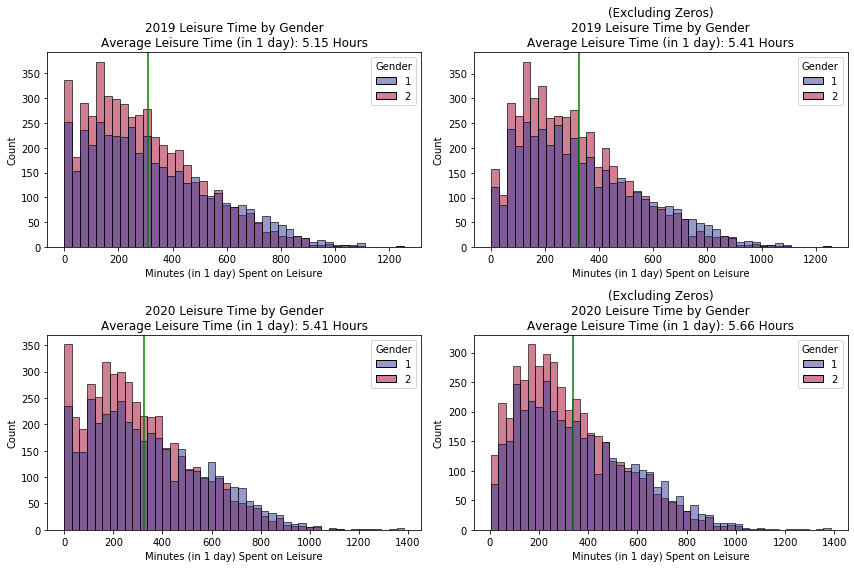

In [25]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

plotLeisuredf2019 = df2019[df2019["LeisureTime"]>0]
plotLeisuredf2020 = df2020[df2020["LeisureTime"]>0]

#Plot 2019 Figure with zero on ax1:
sns.histplot(ax=ax1, data=df2019, x="LeisureTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax1.axvline(df2019["LeisureTime"].mean(), color='g')
ax1.set_title("2019 Leisure Time by Gender\nAverage Leisure Time (in 1 day): {} Hours".format((df2019["LeisureTime"].mean()/60).round(2)))
ax1.set_xlabel("Minutes (in 1 day) Spent on Leisure")

#Plot 2019 Figure without zeros on ax2:
sns.histplot(ax=ax2, data=plotLeisuredf2019, x="LeisureTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax2.axvline(plotLeisuredf2019["LeisureTime"].mean(), color='g')
ax2.set_title("(Excluding Zeros)\n2019 Leisure Time by Gender\nAverage Leisure Time (in 1 day): {} Hours".format((plotLeisuredf2019["LeisureTime"].mean()/60).round(2)))
ax2.set_xlabel("Minutes (in 1 day) Spent on Leisure")

#Plot 2020 Figure with zero on ax3:
sns.histplot(ax=ax3, data=df2020, x="LeisureTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax3.axvline(df2020["LeisureTime"].mean(), color='g')
ax3.set_title("2020 Leisure Time by Gender\nAverage Leisure Time (in 1 day): {} Hours".format((df2020["LeisureTime"].mean()/60).round(2)))
ax3.set_xlabel("Minutes (in 1 day) Spent on Leisure")

#Plot 2020 Figure without zeros on ax4:
sns.histplot(ax=ax4, data=plotLeisuredf2020, x="LeisureTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax4.axvline(plotLeisuredf2020["LeisureTime"].mean(), color='g')
ax4.set_title("(Excluding Zeros)\n2020 Leisure Time by Gender\nAverage Leisure Time (in 1 day): {} Hours".format((plotLeisuredf2020["LeisureTime"].mean()/60).round(2)))
ax4.set_xlabel("Minutes (in 1 day) Spent on Leisure")

fig.tight_layout()
fig.show()

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


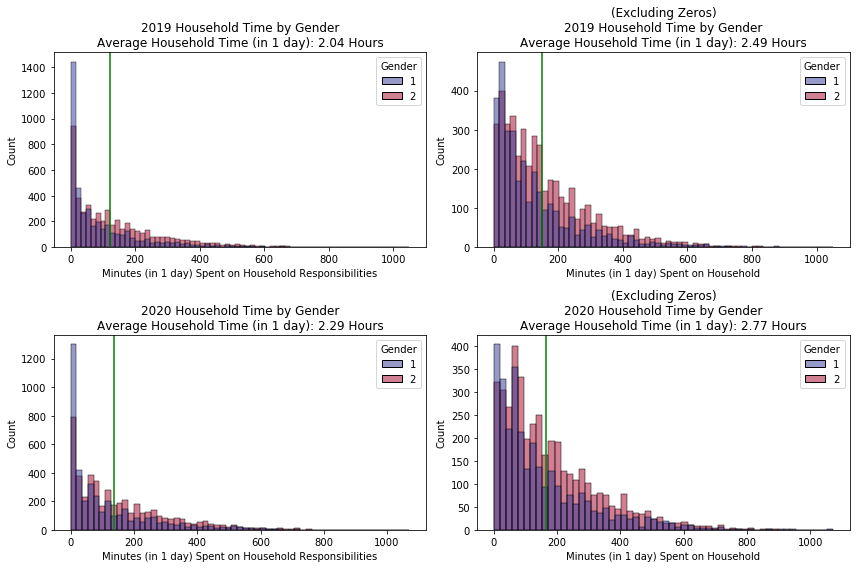

In [26]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

plotHousedf2019 = df2019[df2019["HouseholdTime"]>0]
plotHousedf2020 = df2020[df2020["HouseholdTime"]>0]

#Plot 2019 Figure with zero on ax1:
sns.histplot(ax=ax1, data=df2019, x="HouseholdTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax1.axvline(df2019["HouseholdTime"].mean(), color='g')
ax1.set_title("2019 Household Time by Gender\nAverage Household Time (in 1 day): {} Hours".format((df2019["HouseholdTime"].mean()/60).round(2)))
ax1.set_xlabel("Minutes (in 1 day) Spent on Household Responsibilities")

#Plot 2019 Figure without zeros on ax2:
sns.histplot(ax=ax2, data=plotHousedf2019, x="HouseholdTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax2.axvline(plotHousedf2019["HouseholdTime"].mean(), color='g')
ax2.set_title("(Excluding Zeros)\n2019 Household Time by Gender\nAverage Household Time (in 1 day): {} Hours".format((plotHousedf2019["HouseholdTime"].mean()/60).round(2)))
ax2.set_xlabel("Minutes (in 1 day) Spent on Household")

#Plot 2020 Figure with zero on ax3:
sns.histplot(ax=ax3, data=df2020, x="HouseholdTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax3.axvline(df2020["HouseholdTime"].mean(), color='g')
ax3.set_title("2020 Household Time by Gender\nAverage Household Time (in 1 day): {} Hours".format((df2020["HouseholdTime"].mean()/60).round(2)))
ax3.set_xlabel("Minutes (in 1 day) Spent on Household Responsibilities")

#Plot 2020 Figure without zeros on ax4:
sns.histplot(ax=ax4, data=plotHousedf2020, x="HouseholdTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax4.axvline(plotHousedf2020["HouseholdTime"].mean(), color='g')
ax4.set_title("(Excluding Zeros)\n2020 Household Time by Gender\nAverage Household Time (in 1 day): {} Hours".format((plotHousedf2020["HouseholdTime"].mean()/60).round(2)))
ax4.set_xlabel("Minutes (in 1 day) Spent on Household")

fig.tight_layout()
fig.show()

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


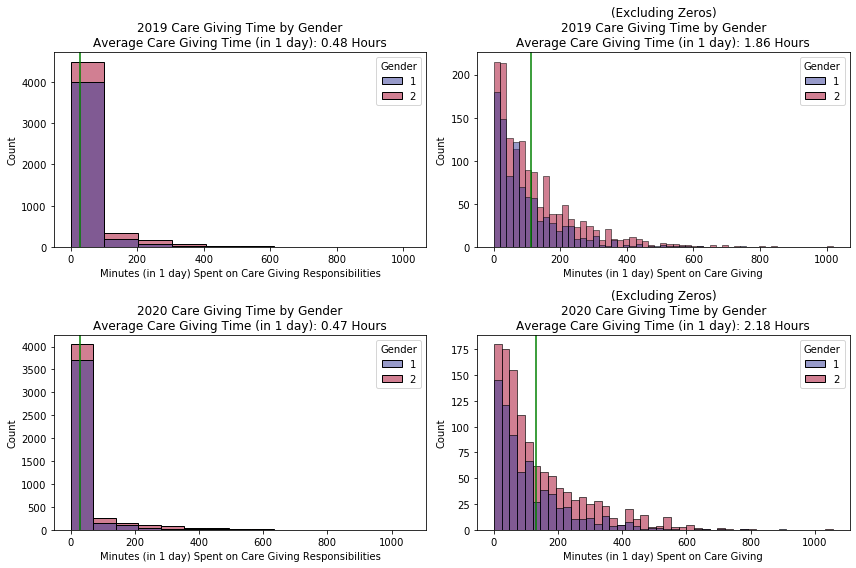

In [27]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

plotCaredf2019 = df2019[df2019["CareTime"]>0]
plotCaredf2020 = df2020[df2020["CareTime"]>0]

#Plot 2019 Figure with zero on ax1:
#sns.histplot(ax=ax1, data=df2019, x="CareTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
sns.histplot(ax=ax1, data=df2019, x="CareTime", hue="Gender", bins=10, palette='RdYlBu_r', fill=True, kde=False)
ax1.axvline(df2019["CareTime"].mean(), color='g')
ax1.set_title("2019 Care Giving Time by Gender\nAverage Care Giving Time (in 1 day): {} Hours".format((df2019["CareTime"].mean()/60).round(2)))
ax1.set_xlabel("Minutes (in 1 day) Spent on Care Giving Responsibilities")

#Plot 2019 Figure without zeros on ax2:
sns.histplot(ax=ax2, data=plotCaredf2019, x="CareTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax2.axvline(plotCaredf2019["CareTime"].mean(), color='g')
ax2.set_title("(Excluding Zeros)\n2019 Care Giving Time by Gender\nAverage Care Giving Time (in 1 day): {} Hours".format((plotCaredf2019["CareTime"].mean()/60).round(2)))
ax2.set_xlabel("Minutes (in 1 day) Spent on Care Giving")

#Plot 2020 Figure with zero on ax3:
sns.histplot(ax=ax3, data=df2020, x="CareTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax3.axvline(df2020["CareTime"].mean(), color='g')
ax3.set_title("2020 Care Giving Time by Gender\nAverage Care Giving Time (in 1 day): {} Hours".format((df2020["CareTime"].mean()/60).round(2)))
ax3.set_xlabel("Minutes (in 1 day) Spent on Care Giving Responsibilities")

#Plot 2020 Figure without zeros on ax4:
sns.histplot(ax=ax4, data=plotCaredf2020, x="CareTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax4.axvline(plotCaredf2020["CareTime"].mean(), color='g')
ax4.set_title("(Excluding Zeros)\n2020 Care Giving Time by Gender\nAverage Care Giving Time (in 1 day): {} Hours".format((plotCaredf2020["CareTime"].mean()/60).round(2)))
ax4.set_xlabel("Minutes (in 1 day) Spent on Care Giving")

fig.tight_layout()
fig.show()

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


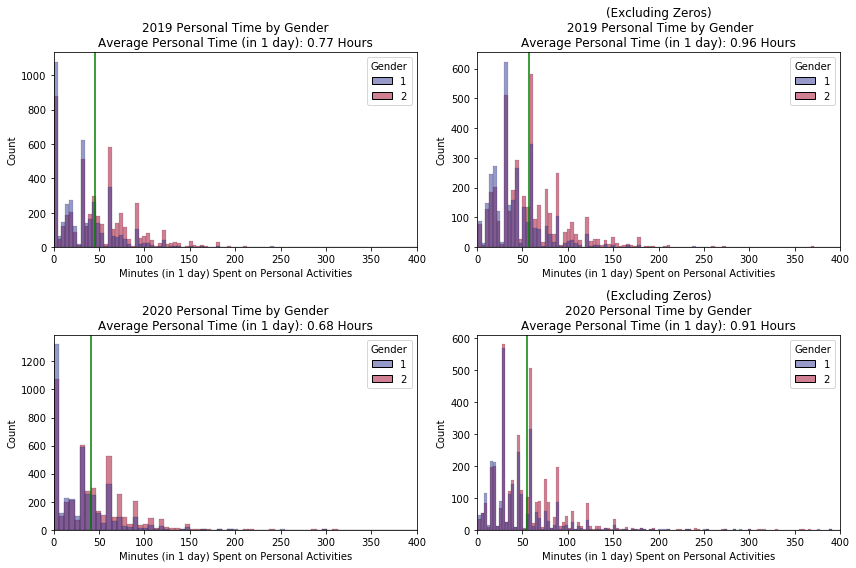

In [28]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

plotPersonaldf2019 = df2019[df2019["PersonalTime"]>0]
plotPersonaldf2020 = df2020[df2020["PersonalTime"]>0]

#Plot 2019 Figure with zero on ax1:
sns.histplot(ax=ax1, data=df2019, x="PersonalTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax1.axvline(df2019["PersonalTime"].mean(), color='g')
ax1.set_title("2019 Personal Time by Gender\nAverage Personal Time (in 1 day): {} Hours".format((df2019["PersonalTime"].mean()/60).round(2)))
ax1.set_xlabel("Minutes (in 1 day) Spent on Personal Activities")
ax1.set_xlim(0,400)

#Plot 2019 Figure without zeros on ax2:
sns.histplot(ax=ax2, data=plotPersonaldf2019, x="PersonalTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax2.axvline(plotPersonaldf2019["PersonalTime"].mean(), color='g')
ax2.set_title("(Excluding Zeros)\n 2019 Personal Time by Gender\nAverage Personal Time (in 1 day): {} Hours".format((plotPersonaldf2019["PersonalTime"].mean()/60).round(2)))
ax2.set_xlabel("Minutes (in 1 day) Spent on Personal Activities")
ax2.set_xlim(0,400)

#Plot 2020 Figure with zero on ax3:
sns.histplot(ax=ax3, data=df2020, x="PersonalTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax3.axvline(df2020["PersonalTime"].mean(), color='g')
ax3.set_title("2020 Personal Time by Gender\nAverage Personal Time (in 1 day): {} Hours".format((df2020["PersonalTime"].mean()/60).round(2)))
ax3.set_xlabel("Minutes (in 1 day) Spent on Personal Activities")
ax3.set_xlim(0,400)

#Plot 2020 Figure without zeros on ax4:
sns.histplot(ax=ax4, data=plotPersonaldf2020, x="PersonalTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax4.axvline(plotPersonaldf2020["PersonalTime"].mean(), color='g')
ax4.set_title("(Excluding Zeros)\n2020 Personal Time by Gender\nAverage Personal Time (in 1 day): {} Hours".format((plotPersonaldf2020["PersonalTime"].mean()/60).round(2)))
ax4.set_xlabel("Minutes (in 1 day) Spent on Personal Activities")
ax4.set_xlim(0,400)

fig.tight_layout()
fig.show()

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


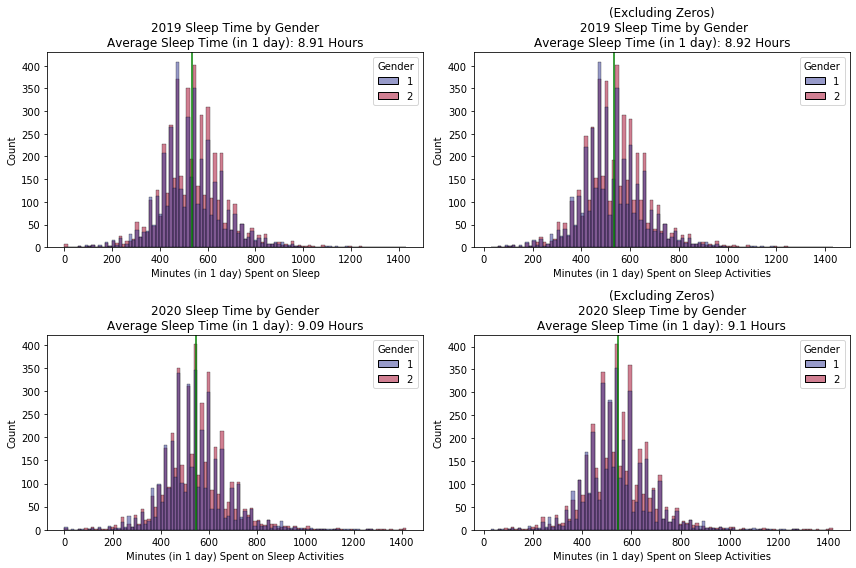

In [30]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

plotPersonaldf2019 = df2019[df2019["SleepTime"]>0]
plotPersonaldf2020 = df2020[df2020["SleepTime"]>0]

#Plot 2019 Figure with zero on ax1:
sns.histplot(ax=ax1, data=df2019, x="SleepTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax1.axvline(df2019["SleepTime"].mean(), color='g')
ax1.set_title("2019 Sleep Time by Gender\nAverage Sleep Time (in 1 day): {} Hours".format((df2019["SleepTime"].mean()/60).round(2)))
ax1.set_xlabel("Minutes (in 1 day) Spent on Sleep")
#ax1.set_xlim(0,400)

#Plot 2019 Figure without zeros on ax2:
sns.histplot(ax=ax2, data=plotPersonaldf2019, x="SleepTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax2.axvline(plotPersonaldf2019["SleepTime"].mean(), color='g')
ax2.set_title("(Excluding Zeros)\n 2019 Sleep Time by Gender\nAverage Sleep Time (in 1 day): {} Hours".format((plotPersonaldf2019["SleepTime"].mean()/60).round(2)))
ax2.set_xlabel("Minutes (in 1 day) Spent on Sleep Activities")
#ax2.set_xlim(0,400)

#Plot 2020 Figure with zero on ax3:
sns.histplot(ax=ax3, data=df2020, x="SleepTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax3.axvline(df2020["SleepTime"].mean(), color='g')
ax3.set_title("2020 Sleep Time by Gender\nAverage Sleep Time (in 1 day): {} Hours".format((df2020["SleepTime"].mean()/60).round(2)))
ax3.set_xlabel("Minutes (in 1 day) Spent on Sleep Activities")
#ax3.set_xlim(0,400)

#Plot 2020 Figure without zeros on ax4:
sns.histplot(ax=ax4, data=plotPersonaldf2020, x="SleepTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax4.axvline(plotPersonaldf2020["SleepTime"].mean(), color='g')
ax4.set_title("(Excluding Zeros)\n2020 Sleep Time by Gender\nAverage Sleep Time (in 1 day): {} Hours".format((plotPersonaldf2020["SleepTime"].mean()/60).round(2)))
ax4.set_xlabel("Minutes (in 1 day) Spent on Sleep Activities")
#ax4.set_xlim(0,400)

fig.tight_layout()
fig.show()

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


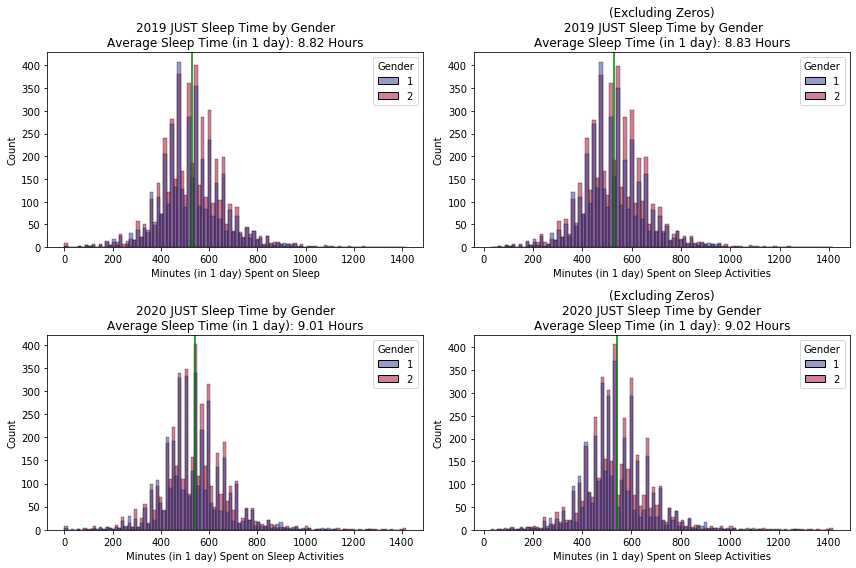

In [36]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

plotPersonaldf2019 = df2019[df2019["JustSleepTime"]>0]
plotPersonaldf2020 = df2020[df2020["JustSleepTime"]>0]

#Plot 2019 Figure with zero on ax1:
sns.histplot(ax=ax1, data=df2019, x="JustSleepTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax1.axvline(df2019["JustSleepTime"].mean(), color='g')
ax1.set_title("2019 JUST Sleep Time by Gender\nAverage Sleep Time (in 1 day): {} Hours".format((df2019["JustSleepTime"].mean()/60).round(2)))
ax1.set_xlabel("Minutes (in 1 day) Spent on Sleep")
#ax1.set_xlim(0,400)

#Plot 2019 Figure without zeros on ax2:
sns.histplot(ax=ax2, data=plotPersonaldf2019, x="JustSleepTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax2.axvline(plotPersonaldf2019["JustSleepTime"].mean(), color='g')
ax2.set_title("(Excluding Zeros)\n 2019 JUST Sleep Time by Gender\nAverage Sleep Time (in 1 day): {} Hours".format((plotPersonaldf2019["JustSleepTime"].mean()/60).round(2)))
ax2.set_xlabel("Minutes (in 1 day) Spent on Sleep Activities")
#ax2.set_xlim(0,400)

#Plot 2020 Figure with zero on ax3:
sns.histplot(ax=ax3, data=df2020, x="JustSleepTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax3.axvline(df2020["JustSleepTime"].mean(), color='g')
ax3.set_title("2020 JUST Sleep Time by Gender\nAverage Sleep Time (in 1 day): {} Hours".format((df2020["JustSleepTime"].mean()/60).round(2)))
ax3.set_xlabel("Minutes (in 1 day) Spent on Sleep Activities")
#ax3.set_xlim(0,400)

#Plot 2020 Figure without zeros on ax4:
sns.histplot(ax=ax4, data=plotPersonaldf2020, x="JustSleepTime", hue='Gender', palette='RdYlBu_r', fill=True, kde=False)
ax4.axvline(plotPersonaldf2020["JustSleepTime"].mean(), color='g')
ax4.set_title("(Excluding Zeros)\n2020 JUST Sleep Time by Gender\nAverage Sleep Time (in 1 day): {} Hours".format((plotPersonaldf2020["JustSleepTime"].mean()/60).round(2)))
ax4.set_xlabel("Minutes (in 1 day) Spent on Sleep Activities")
#ax4.set_xlim(0,400)

fig.tight_layout()
fig.show()

In [37]:
#First combine 2019 and 2020 into one dataframe for moderating variable

df2019['Year'] = 2019
df2020['Year'] = 2020
df_bothyears = pd.concat([df2019, df2020])

In [38]:
df_bothyears

,MetropolitanStatus,LaborForceStatus,Age,SpouseEmployStatus,HighestEduComplete,TimeSpent_ChildcareLess13,Enrolled_HSCollUni,DiaryDay_HolidayBool,CaseID,SpousePresentinHousehold,DiaryDayofWeek,MoreThan1JobBool,EmploymentStatus,NumChildUnder18,WeeklyEarnings,AgeYoungestChildLessThan18,HispanicBool,Race,WEIGHT2019,Gender,CurrEduEnrollType,HoursWorkedperWeek,TimeSpent_Eldercare,PartnerEmployedStatus,PersonalTime,SleepTime,HouseholdTime,CareTime,WorkTime,LeisureTime,JustSleepTime,Year,WEIGHT2020
0,1,5,85,-1,40,0,-1,0,20190101190022,3,1,-1,-1,0,-1,-1,2,2,2.286291e+06,2,-1,-1,-1,-1,30,660,0,0,0,420,660,2019,NaN
1,1,1,25,1,37,660,2,0,20190101190031,2,4,2,2,1,16500,3,1,1,5.372903e+07,2,-1,20,-1,1,0,540,13,0,0,877,540,2019,NaN
2,1,1,20,-1,40,0,2,0,20190101190057,3,5,2,2,0,30000,-1,1,1,2.378910e+07,2,-1,20,385,-1,60,645,0,5,390,300,645,2019,NaN
3,1,4,61,-1,42,0,-1,0,20190101190107,1,3,-1,-1,0,-1,-1,1,1,2.224150e+07,2,-1,-1,115,2,75,375,75,588,0,100,375,2019,NaN
4,2,1,34,3,43,545,2,0,20190101190555,1,1,2,1,1,-1,2,2,1,2.599757e+06,1,-1,-4,-1,1,15,480,0,130,75,580,480,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8777,1,1,35,1,43,870,2,0,20201212202264,1,4,2,1,1,-1,2,2,1,NaN,1,-1,60,-1,1,0,420,0,0,735,210,420,2020,1.051645e+07
8778,1,5,26,1,34,765,2,0,20201212202289,1,1,-1,-1,2,-1,1,2,1,NaN,2,-1,-1,-1,1,15,665,0,0,0,450,545,2020,8.104561e+06
8779,1,2,37,-1,44,0,2,0,20201212202303,1,1,2,1,0,259615,-1,2,1,NaN,1,-1,40,-1,2,15,555,42,0,0,390,555,2020,9.937817e+06
8780,1,2,41,1,43,720,1,0,20201212202312,1,3,2,1,2,96153,8,2,1,NaN,2,2,60,15,1,60,720,235,0,0,390,720,2020,9.167486e+06



$$y = \beta_0 + \beta_1 * X_1 + \beta_2 * X_2 + \beta_3 * X_3 + .....$$


In [ ]:
#First regression:
# Age + WeeklyEarnings + Gender + Year --> Hours Worked

In [39]:
dfreg1 = df_bothyears[["Age","WeeklyEarnings","Gender","WorkTime","Year"]]

In [41]:
#1HE Diary day
diaryweekDummies = pd.get_dummies(df_bothyears['DiaryDayofWeek'], drop_first=True)
diaryweekDummies.columns = ["Mon","Tues","Wed","Thurs","Fri","Sat"] #excludes "Sun"

In [43]:
dfreg1 = pd.concat([dfreg1, diaryweekDummies],axis=1)

In [44]:
dfreg1

,Age,WeeklyEarnings,Gender,WorkTime,Year,Mon,Tues,Wed,Thurs,Fri,Sat
0,85,-1,2,0,2019,0,0,0,0,0,0
1,25,16500,2,0,2019,0,0,1,0,0,0
2,20,30000,2,390,2019,0,0,0,1,0,0
3,61,-1,2,0,2019,0,1,0,0,0,0
4,34,-1,1,75,2019,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8777,35,-1,1,735,2020,0,0,1,0,0,0
8778,26,-1,2,0,2020,0,0,0,0,0,0
8779,37,259615,1,0,2020,0,0,0,0,0,0
8780,41,96153,2,0,2020,0,1,0,0,0,0


In [45]:
dfreg1 = dfreg1[dfreg1["WorkTime"]>0]

In [46]:
dfreg1.reset_index(inplace=True, drop=True)

In [48]:
dfreg1["WeeklyEarnings"] = dfreg1["WeeklyEarnings"]/100
dfreg1

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,WeeklyEarnings,Gender,WorkTime,Year,Mon,Tues,Wed,Thurs,Fri,Sat
0,20,300.00,2,390,2019,0,0,0,1,0,0
1,34,-0.01,1,75,2019,0,0,0,0,0,0
2,53,2115.38,2,460,2019,0,1,0,0,0,0
3,36,653.00,1,690,2019,0,0,0,1,0,0
4,40,1788.46,1,150,2019,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6352,51,730.76,2,505,2020,1,0,0,0,0,0
6353,56,2884.61,1,525,2020,0,0,1,0,0,0
6354,54,420.00,2,432,2020,1,0,0,0,0,0
6355,63,2041.50,2,675,2020,1,0,0,0,0,0


(array([1342.,  871., 1027.,  777.,  677.,  412.,  347.,  195.,  179.,
         530.]),
 array([-1.000000e-02,  2.884520e+02,  5.769140e+02,  8.653760e+02,
         1.153838e+03,  1.442300e+03,  1.730762e+03,  2.019224e+03,
         2.307686e+03,  2.596148e+03,  2.884610e+03]),
 <a list of 10 Patch objects>)

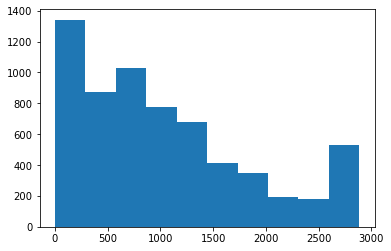

In [49]:
plt.hist(dfreg1["WeeklyEarnings"].values)

C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(0, 8)

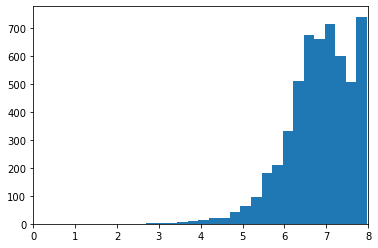

In [50]:
logvals = np.log(dfreg1["WeeklyEarnings"].values)
logvals = logvals[~np.isnan(logvals)]
logvals = logvals[~np.isinf(logvals)]
plt.hist(logvals,bins=50);
plt.xlim((0, 8))

In [51]:
dfreg1['LogEarnings'] = np.log(dfreg1['WeeklyEarnings'])

C:\Users\krmcd\Miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\krmcd\Miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\krmcd\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
dfreg1 = dfreg1[~np.isnan(dfreg1['LogEarnings'])]
dfreg1 = dfreg1[~np.isinf(dfreg1['LogEarnings'])]

In [53]:
dfreg1.head()

,Age,WeeklyEarnings,Gender,WorkTime,Year,Mon,Tues,Wed,Thurs,Fri,Sat,LogEarnings
0,20,300.00,2,390,2019,0,0,0,1,0,0,5.703782
2,53,2115.38,2,460,2019,0,1,0,0,0,0,7.656990
3,36,653.00,1,690,2019,0,0,0,1,0,0,6.481577
4,40,1788.46,1,150,2019,0,0,0,0,0,0,7.489110
5,53,1442.30,1,592,2019,0,0,0,1,0,0,7.273994


In [54]:
dfreg1.drop(['WeeklyEarnings'],axis=1, inplace=True)

In [55]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [56]:
dfreg1 = sm.add_constant(dfreg1)

C:\Users\krmcd\Miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
dfreg1

,const,Age,Gender,WorkTime,Year,Mon,Tues,Wed,Thurs,Fri,Sat,LogEarnings
0,1.0,20,2,390,2019,0,0,0,1,0,0,5.703782
2,1.0,53,2,460,2019,0,1,0,0,0,0,7.656990
3,1.0,36,1,690,2019,0,0,0,1,0,0,6.481577
4,1.0,40,1,150,2019,0,0,0,0,0,0,7.489110
5,1.0,53,1,592,2019,0,0,0,1,0,0,7.273994
...,...,...,...,...,...,...,...,...,...,...,...,...
6351,1.0,61,2,570,2020,0,1,0,0,0,0,7.399160
6352,1.0,51,2,505,2020,1,0,0,0,0,0,6.594085
6353,1.0,56,1,525,2020,0,0,1,0,0,0,7.967145
6354,1.0,54,2,432,2020,1,0,0,0,0,0,6.040255


In [58]:
regmodel1test = smf.ols(formula="WorkTime ~ Age + Gender + Year + Mon + Tues + Wed + Thurs + Fri + Sat + LogEarnings + Gender*Year", data=dfreg1)

In [59]:
res1 = regmodel1test.fit()

In [62]:
dfreg1.describe()

,const,Age,Gender,WorkTime,Year,Mon,Tues,Wed,Thurs,Fri,Sat,LogEarnings
count,5422.0,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,1.0,44.258576,1.472704,438.493360,2019.465511,0.146256,0.152896,0.151789,0.144781,0.133714,0.137956,6.823077
std,0.0,13.596984,0.499300,196.438799,0.498855,0.353395,0.359920,0.358849,0.351912,0.340377,0.344886,0.845202
min,1.0,15.000000,1.000000,1.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.605170
25%,1.0,34.000000,1.000000,345.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.396930
50%,1.0,43.000000,1.000000,480.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.907755
75%,1.0,55.000000,2.000000,550.000000,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.410855
max,1.0,85.000000,2.000000,1370.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.967145


In [60]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WorkTime   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          9.52e-225
Time:                        18:32:34   Log-Likelihood:                -35782.
No. Observations:                5422   AIC:                         7.159e+04
Df Residuals:                    5410   BIC:                         7.167e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9338.1614   3.05e+04      0.306      0.760   -5.05e+04    6.92e+04
Age            -0.5784      0.180     -3.219      0.001      -0.931      -0.226
Gender       -1.03e+04   1.96e+04     -0.525      0.600   -4.88e+04    2.82e+04
Year           -4.5151     15.118     -0.299      0.765     -34.153      25.123
Mon           190.9258      9.172     20.816      0.000     172.945     208.907
Tues          191.4484      9.077     21.093      0.000     173.655     209.242
Wed           189.0037      9.089     20.794      0.000     171.185     206.823
Thurs         204.3623      9.193     22.229      0.000     186.340     222.385
Fri           181.3110      9.371     19.347      0.000     162.939     199.683
Sat            39.7703      9.306      4.274      0.000      21.527      58.014
LogEarnings    22.6809      2.949      7.692      0.000      16.900      28.462
Gender:Year     5.0835      9.716      0.523      0.601     -13.964      24.131
==============================================================================
Omnibus:                      153.086   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.429
Skew:                           0.110   Prob(JB):                     1.47e-78
Kurtosis:                       4.240   Cond. No.                     5.48e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
dfreg2 = df_bothyears[["Age","WeeklyEarnings","Gender","WorkTime","Year","PersonalTime"]]
dfreg2 = pd.concat([dfreg2, diaryweekDummies],axis=1)
dfreg2 = dfreg2[dfreg2["WorkTime"]>0]
dfreg2.reset_index(inplace=True, drop=True)
dfreg2["WeeklyEarnings"] = dfreg2["WeeklyEarnings"]/100
dfreg2['LogEarnings'] = np.log(dfreg2['WeeklyEarnings'])
dfreg2 = dfreg2[~np.isnan(dfreg2['LogEarnings'])]
dfreg2 = dfreg2[~np.isinf(dfreg2['LogEarnings'])]
dfreg2['Gender'] = dfreg2['Gender']-1
dfreg2.drop(['WeeklyEarnings'],axis=1, inplace=True)
dfreg2 = sm.add_constant(dfreg2)

C:\Users\krmcd\Miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\krmcd\Miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\krmcd\Miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [64]:
dfreg2

,const,Age,Gender,WorkTime,Year,PersonalTime,Mon,Tues,Wed,Thurs,Fri,Sat,LogEarnings
0,1.0,20,1,390,2019,60,0,0,0,1,0,0,5.703782
2,1.0,53,1,460,2019,25,0,1,0,0,0,0,7.656990
3,1.0,36,0,690,2019,7,0,0,0,1,0,0,6.481577
4,1.0,40,0,150,2019,60,0,0,0,0,0,0,7.489110
5,1.0,53,0,592,2019,60,0,0,0,1,0,0,7.273994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,1.0,61,1,570,2020,120,0,1,0,0,0,0,7.399160
6352,1.0,51,1,505,2020,150,1,0,0,0,0,0,6.594085
6353,1.0,56,0,525,2020,45,0,0,1,0,0,0,7.967145
6354,1.0,54,1,432,2020,45,1,0,0,0,0,0,6.040255


In [65]:
regmodel2test = smf.ols(formula="PersonalTime ~ Age + Gender + WorkTime + Year + Mon + Tues + Wed + Thurs + Fri + Sat + LogEarnings + Gender*Year", data=dfreg2)

In [66]:
res2 = regmodel2test.fit()

In [67]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PersonalTime   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     25.21
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           6.17e-56
Time:                        18:39:24   Log-Likelihood:                -27046.
No. Observations:                5422   AIC:                         5.412e+04
Df Residuals:                    5409   BIC:                         5.420e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2133.4011   2697.182      0.791      0.429   -3154.161    7420.963
Age             0.1287      0.036      3.584      0.000       0.058       0.199
Gender       8656.7513   3917.775      2.210      0.027     976.335    1.63e+04
WorkTime        0.0098      0.003      3.618      0.000       0.005       0.015
Year           -1.0291      1.336     -0.770      0.441      -3.648       1.589
Mon             0.4151      1.903      0.218      0.827      -3.316       4.146
Tues           -0.9616      1.885     -0.510      0.610      -4.657       2.734
Wed            -0.6510      1.886     -0.345      0.730      -4.348       3.046
Thurs          -2.3904      1.918     -1.247      0.213      -6.150       1.369
Fri            -1.4535      1.935     -0.751      0.453      -5.246       2.339
Sat            -1.0162      1.861     -0.546      0.585      -4.665       2.633
LogEarnings    -3.6380      0.592     -6.146      0.000      -4.798      -2.477
Gender:Year    -4.2797      1.940     -2.206      0.027      -8.083      -0.477
==============================================================================
Omnibus:                     3841.074   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214548.546
Skew:                           2.788   Prob(JB):                         0.00
Kurtosis:                      33.308   Cond. No.                     2.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
Female2019 = dfreg2[(dfreg2['Year']==2019)&(dfreg2['Gender']==1)]['PersonalTime'].mean()
Female2020 = dfreg2[(dfreg2['Year']==2020)&(dfreg2['Gender']==1)]['PersonalTime'].mean()
Male2019 = dfreg2[(dfreg2['Year']==2019)&(dfreg2['Gender']==0)]['PersonalTime'].mean()
Male2020 = dfreg2[(dfreg2['Year']==2020)&(dfreg2['Gender']==0)]['PersonalTime'].mean()

#### Plot means for males/females in 2019 and 2020 to visualize the interaction

Text(0.5, 0, 'Year')

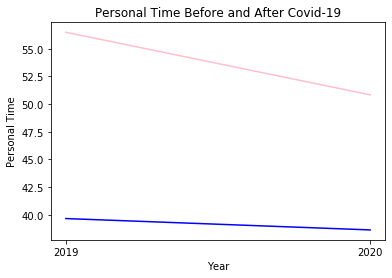

In [69]:
plt.plot([Female2019, Female2020], c='pink')
plt.plot([Male2019, Male2020], c='blue')
plt.ylabel("Personal Time")
plt.title("Personal Time Before and After Covid-19")
plt.xticks([0,1],[2019,2020])
plt.xlabel("Year")

In [70]:
dfreg2 = df_bothyears[["Age","WeeklyEarnings","Gender","WorkTime","Year","JustSleepTime"]]
dfreg2 = pd.concat([dfreg2, diaryweekDummies],axis=1)
dfreg2 = dfreg2[dfreg2["WorkTime"]>0]
dfreg2.reset_index(inplace=True, drop=True)
dfreg2["WeeklyEarnings"] = dfreg2["WeeklyEarnings"]/100
dfreg2['LogEarnings'] = np.log(dfreg2['WeeklyEarnings'])
dfreg2 = dfreg2[~np.isnan(dfreg2['LogEarnings'])]
dfreg2 = dfreg2[~np.isinf(dfreg2['LogEarnings'])]
dfreg2['Gender'] = dfreg2['Gender']-1
dfreg2.drop(['WeeklyEarnings'],axis=1, inplace=True)
dfreg2 = sm.add_constant(dfreg2)

C:\Users\krmcd\Miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\krmcd\Miniconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\krmcd\Miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
dfreg2

,const,Age,Gender,WorkTime,Year,JustSleepTime,Mon,Tues,Wed,Thurs,Fri,Sat,LogEarnings
0,1.0,20,1,390,2019,645,0,0,0,1,0,0,5.703782
2,1.0,53,1,460,2019,365,0,1,0,0,0,0,7.656990
3,1.0,36,0,690,2019,420,0,0,0,1,0,0,6.481577
4,1.0,40,0,150,2019,450,0,0,0,0,0,0,7.489110
5,1.0,53,0,592,2019,485,0,0,0,1,0,0,7.273994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,1.0,61,1,570,2020,330,0,1,0,0,0,0,7.399160
6352,1.0,51,1,505,2020,410,1,0,0,0,0,0,6.594085
6353,1.0,56,0,525,2020,525,0,0,1,0,0,0,7.967145
6354,1.0,54,1,432,2020,630,1,0,0,0,0,0,6.040255


In [72]:
regmodel2test = smf.ols(formula="JustSleepTime ~ Age + Gender + WorkTime + Year + Mon + Tues + Wed + Thurs + Fri + Sat + LogEarnings + Gender*Year", data=dfreg2)

In [73]:
res2 = regmodel2test.fit()

In [74]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          JustSleepTime   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     83.98
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.53e-190
Time:                        18:44:27   Log-Likelihood:                -32592.
No. Observations:                5422   AIC:                         6.521e+04
Df Residuals:                    5409   BIC:                         6.530e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.164e+04   7501.183     -2.885      0.004   -3.63e+04   -6936.652
Age            -0.9013      0.100     -9.026      0.000      -1.097      -0.706
Gender      -2399.7700   1.09e+04     -0.220      0.826   -2.38e+04     1.9e+04
WorkTime       -0.1859      0.008    -24.630      0.000      -0.201      -0.171
Year           11.0466      3.715      2.974      0.003       3.764      18.329
Mon           -15.7511      5.293     -2.976      0.003     -26.128      -5.375
Tues          -16.7857      5.243     -3.201      0.001     -27.064      -6.507
Wed           -14.2573      5.245     -2.718      0.007     -24.540      -3.975
Thurs         -17.0526      5.333     -3.198      0.001     -27.507      -6.598
Fri           -37.5424      5.381     -6.977      0.000     -48.091     -26.994
Sat           -18.2950      5.176     -3.534      0.000     -28.443      -8.148
LogEarnings    -6.0351      1.646     -3.666      0.000      -9.263      -2.808
Gender:Year     1.1866      5.395      0.220      0.826      -9.390      11.764
==============================================================================
Omnibus:                      262.832   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.169
Skew:                           0.113   Prob(JB):                    9.23e-196
Kurtosis:                       4.981   Cond. No.                     2.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""